In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
HousePDF = pd.read_csv("Housing.csv")


In [ ]:
HousePDF.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
HousePDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
HousePDF.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
HousePDF.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

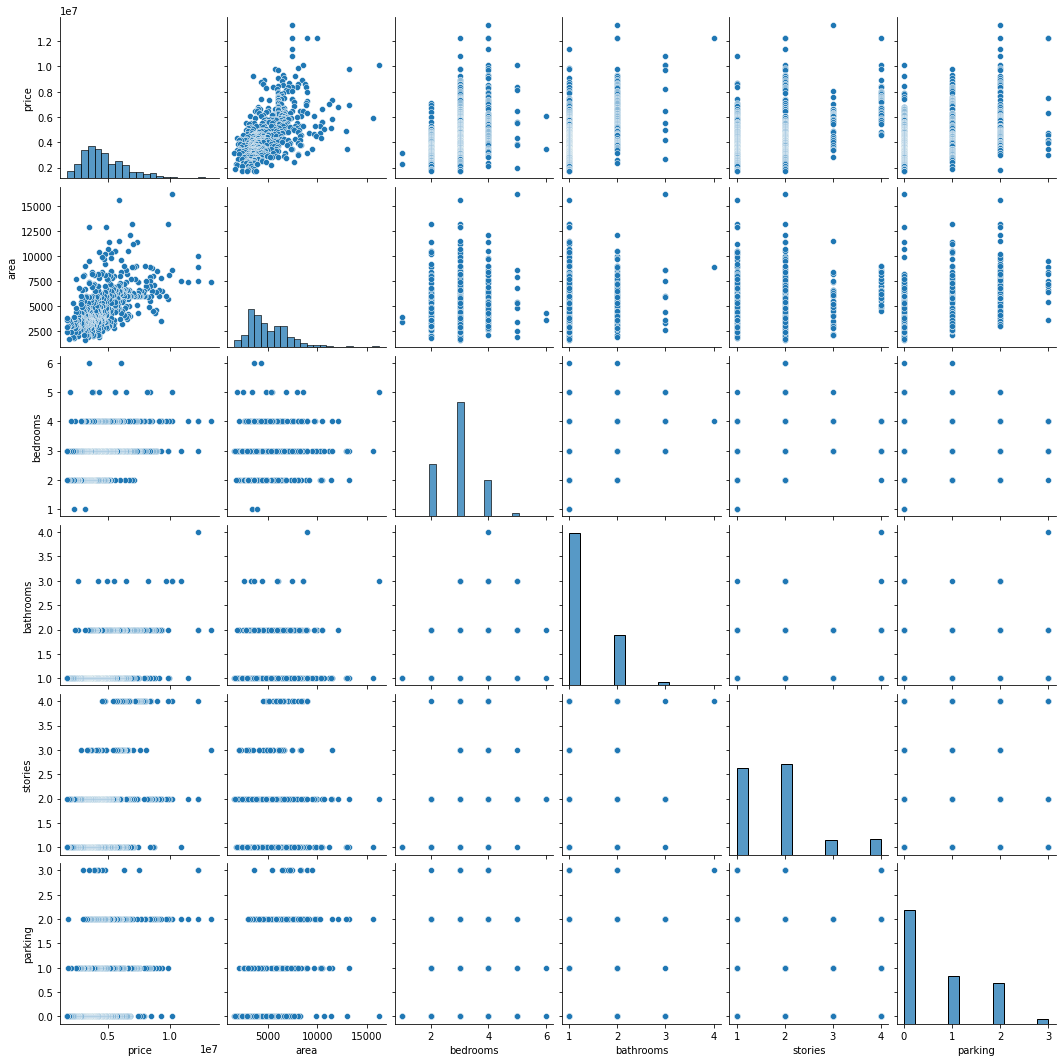

In [ ]:
sns.pairplot(HousePDF)

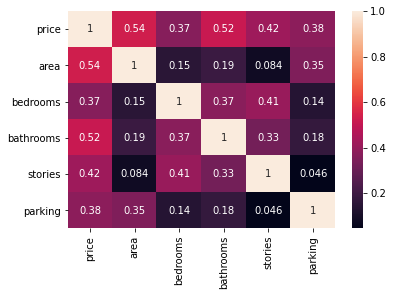

In [ ]:
sns.heatmap(HousePDF.corr(), annot  =True)

In [ ]:
X = HousePDF[['area', 'bedrooms','stories']]

Y=HousePDF['price']

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
X_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.40, random_state=101)

In [ ]:
X_train

,area,bedrooms,stories
375,5960,3,2
187,6100,3,1
109,6615,4,2
454,4500,3,2
382,3150,3,2
...,...,...,...
316,5900,4,2
393,7424,3,1
75,4260,4,2
337,2145,4,1


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
ln=LinearRegression()

In [ ]:
ln.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
coeff_df=pd.DataFrame(ln.coef_,X.columns,columns=['coefficient'])

In [ ]:
coeff_df

,coefficient
area,444.870986
bedrooms,382205.174761
stories,658769.894465


In [ ]:
predictions=ln.predict(x_test)

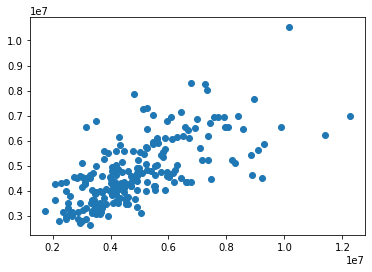

In [ ]:
plt.scatter(y_test,predictions)

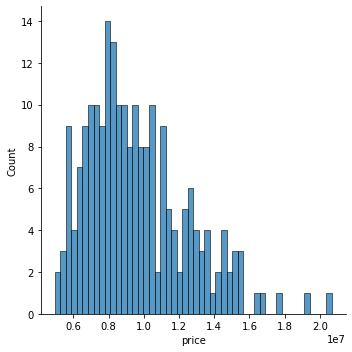

In [ ]:
sns.displot((y_test+predictions),bins=50);